# Load libraries

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import chi2
#%matplotlib inline

# Define functions

In [2]:
def NormalMatrix(x, w, m):
    N = np.zeros((m,m))
    for i in range(0,m):
        for j in range(0,m):
            N[i,j] = sum(w*x**(i+j))
    return N

def Yweight(x, y, w, m):
    Y = np.zeros(m)
    for i in range(0,m):
        Y[i] = sum(w*y*x**i)
    return Y

# Create Data

## Model

Polynomial model with 'a' being a vector holding the polynomial parameters, a[0] is the offset, a[1] the linear parameter ... 

In [3]:
def model(x, a):
    y = 0
    i = 0
    for ai in a:
        y = y + ai*x**i
        i = i + 1
    return y

## Independent variable - x

In [4]:
x_min = 0
x_max = 1
x_n = 10

x = np.linspace(x_min, x_max, x_n)

## Dependent variable - y

## Simulate experiment

In [5]:
# Number of measurements per data point
m = 10

# Measurement uncertainty
sigma = 1

# Scaling of the uncertainties
# I.e. creating unreasonably large or small uncertainties
s_scale = 1


In [6]:
# Full measurement data
a = np.array([1.0, 10.0])
#a = np.array([1.0, -1.0, 3.0])

# Generate empty arrays
y_meas = np.zeros((x_n,m)) # Array holding all individual measurement values
y = np.zeros(x_n) # Vector holding the y values, the mean value of all measurements taken per x_i
w = np.zeros(x_n) # Vector holding the weights of the data points = 1/variance of each y (teh standard error of the mean)


i = 0
# go through all x as x_i
for x_i in x:
    # generate m measured values per x value
    # m normally distributed random numbers reflecting the measurement uncertainty
    noise = np.random.normal(0,1,m)
    # generate m measured values 
    y_i = model(x_i, a) + noise * sigma
    y_meas[i,:] = y_i
    # calculate the mean of all measured values    
    y[i] = np.sum(y_i) / m
    # and the weights (as invers variance)
    w[i] = (m * ( m - 1 )) / np.sum(( y_i - y[i])**2 ) / s_scale**2
    # increment
    i = i + 1

In [7]:
# x values for the model
x_minmod = x_min
x_maxmod = x_max
x_nmod = 10

x_mod = np.linspace(x_minmod, x_maxmod, x_nmod)

# calculate the model line
y_mod = model(x_mod, a)

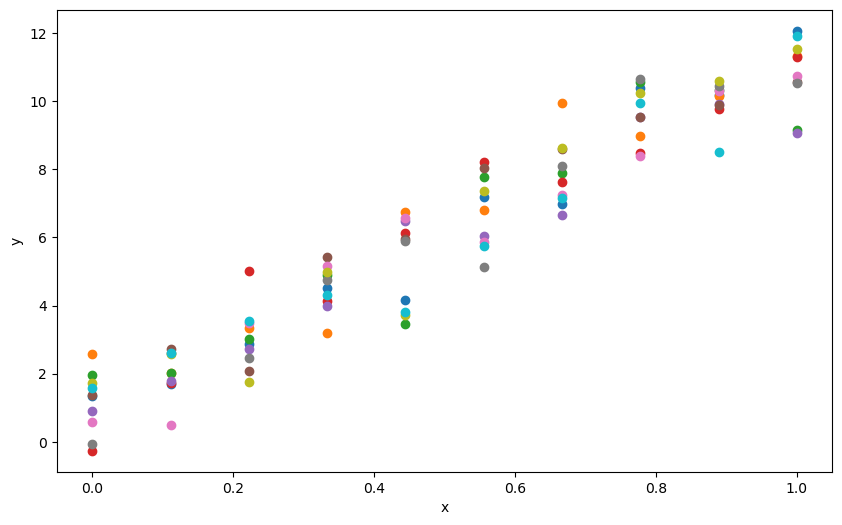

In [8]:
# Plot all data
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.xlabel('x')
plt.ylabel('y')
plt.xscale('linear')
plt.yscale('linear')
plt.plot(x,y_meas, 'o')
plt.show()

## Plot data

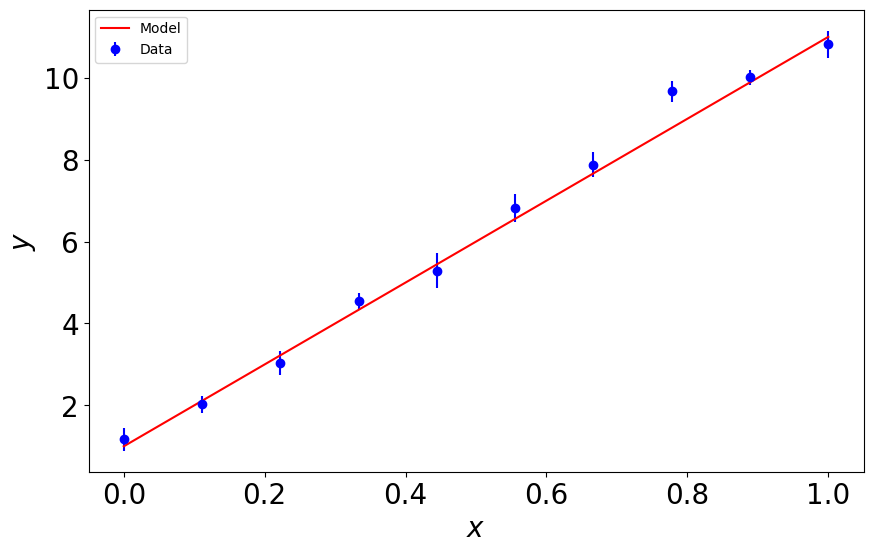

In [10]:
# Plot averaged data and weights
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.errorbar(x,y,yerr=np.sqrt(1/w), fmt='bo', label='Data')
plt.plot(x_mod, y_mod, 'r-', label='Model')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

# Linear regression

In [11]:
m = len(a) # Number of fit parameters
N = NormalMatrix(x, w, m) # Normal matrix
Y = Yweight(x, y, w, m) # Weighted data 

In [12]:
# Invert the normal matrix (equal to the covariance matrix)
Ninv = inv(N)

In [13]:
# Calculate the estimated valued for the model parameters a
a_fit = Ninv@Y

# Plot the fit results

In [14]:
# calculate the fit line
y_fit = model(x_mod, a_fit)

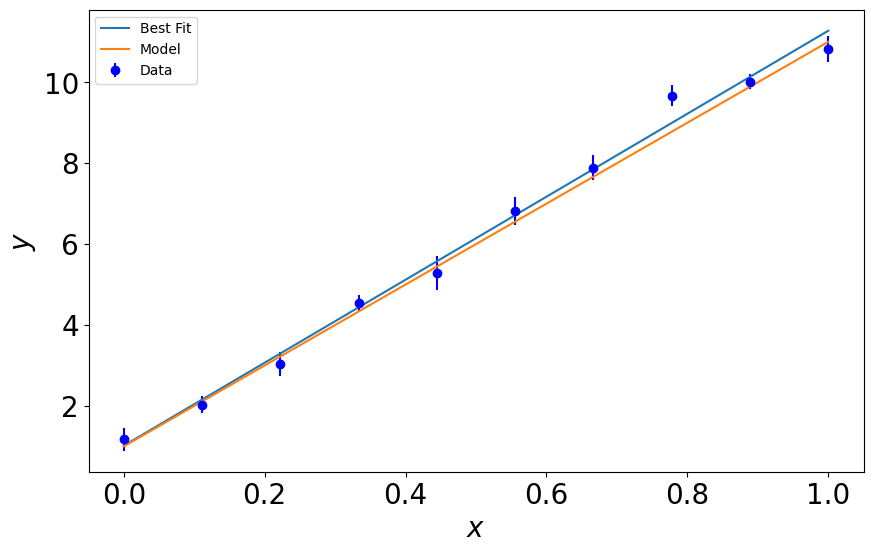

In [15]:
# Plot data and fit results
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.errorbar(x,y,yerr=np.sqrt(1/w), fmt='bo', label='Data')
plt.plot(x_mod, y_fit, label='Best Fit')
plt.plot(x_mod, y_mod, label='Model')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

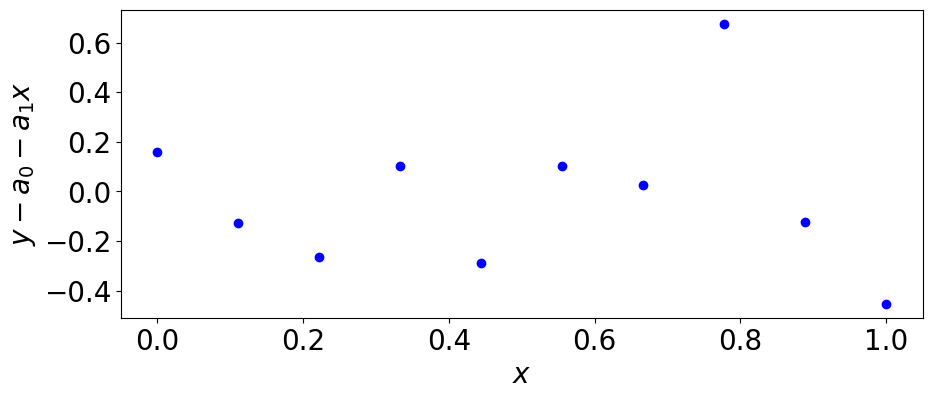

In [16]:
# Plot residuals
plt.figure(
    num=1,
    figsize=(10.35, 4),
    facecolor='white')
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y-a_0-a_1x$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x, y-model(x, a_fit), 'bo')
plt.show()

# Extract best estimators and their uncertainty

In [17]:
i = 0
for ai in a_fit:
    print("a_{} = {:0.1f} +/- {:0.2f}".format(i, ai, np.sqrt(Ninv[i,i])))
    i = i+1

a_0 = 1.0 +/- 0.15
a_1 = 10.3 +/- 0.25


## Model values

In [18]:
i = 0
for ai in a:
    print("a_{} = {:0.1f}".format(i, ai))
    i = i+1

a_0 = 1.0
a_1 = 10.0


# Error Propagation

In [19]:
# Calculate the errors of the fitting parameters using error propagation
delta = np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2

a0 = (np.sum(w * x**2) * np.sum(w * y) - np.sum(w * x) * np.sum(w * x * y)) / delta
a1 = (np.sum(w) * np.sum(w * x * y) - np.sum(w * x) * np.sum(w * y)) / delta

sigma_a0 = np.sqrt( np.sum(w * x**2) / delta )
sigma_a1 = np.sqrt( np.sum(w) / delta )

print("a_0 = {:0.1f} +/- {:0.2f}".format(a0, sigma_a0))
print("a_1 = {:0.1f} +/- {:0.2f}".format(a1, sigma_a1))

a_0 = 1.0 +/- 0.15
a_1 = 10.3 +/- 0.25


# Chi-squared Test

In [20]:
# Calculate S_min (Chi-squared)
S_min = np.sum(w * (y-model(x, a_fit))**2)

print("S_min= {:0.1f}".format(S_min))

S_min= 11.3


In [21]:
# Calculate the number of degrees of freedom
k = len(x)-len(a)
X2_exp = k
X2_std = np.sqrt(2*k)

c_scaled = Ninv * S_min / k

i = 0
for ai in a_fit:
    print("a_{} = {:0.1f} +/- {:0.2f}".format(i, ai, np.sqrt(c_scaled[i,i])))
    i = i+1

print("chi2 = {:0.1f} +/- {:0.1f}".format(X2_exp, X2_std))

a_0 = 1.0 +/- 0.18
a_1 = 10.3 +/- 0.30
chi2 = 8.0 +/- 4.0


In [22]:
# Calculate the Chi-squared distribution function
X2_min = 0
X2_max = 20
n_X2 = 101

X2 = np.linspace(X2_min, X2_max, n_X2)

# Calculate Chi-squared distribution function
f_X2 = chi2.pdf(X2, k)

# Calculate 5% - 95% confidence interval
cum_f_X2 = chi2.cdf(X2, k)

[ip] = np.argwhere(cum_f_X2>0.975)[0]
[im] = np.argwhere(cum_f_X2<0.025)[-1]

X2_25 = X2[im]
X2_975 = X2[ip]

print("Chi_0.025 = {:0.2f}".format(X2_25))
print("Chi_0.0975 = {:0.2f}".format(X2_975))

# Calculate P+ and P-

P_m = chi2.cdf(S_min, k)
P_p = 1 - P_m

print("P- = {:0.2f}".format(P_m))

Chi_0.025 = 2.00
Chi_0.0975 = 17.60
P- = 0.81


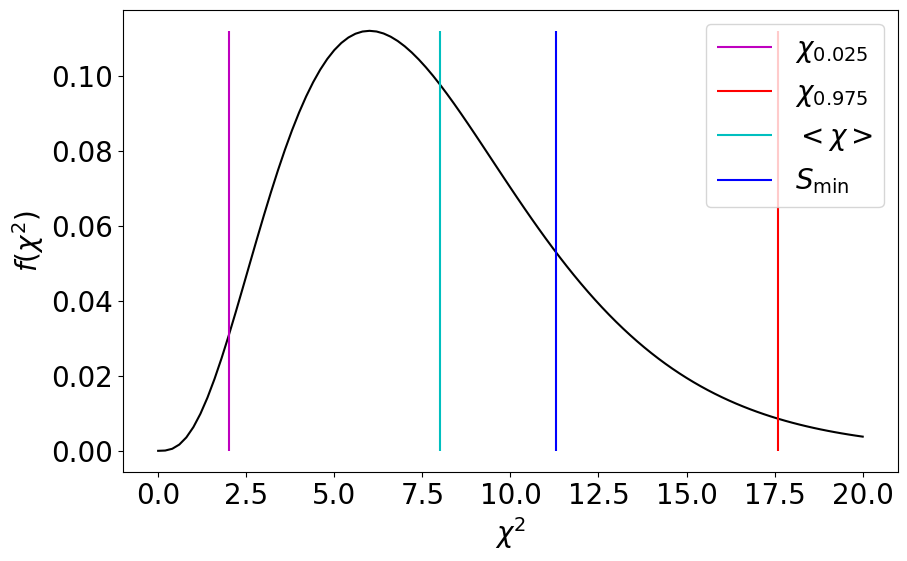

In [24]:
# Plot Chi-squared
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.xlabel(r'$\chi^2$', fontsize=20)
plt.ylabel(r'$f(\chi^2)$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.plot(X2, f_X2 , 'k-')
plt.vlines(X2_25 , 0, np.max(f_X2), 'm', label=r'$\chi_{0.025}$')
plt.vlines(X2_975, 0, np.max(f_X2), 'r', label=r'$\chi_{0.975}$')
plt.vlines(X2_exp, 0, np.max(f_X2), 'c', label=r'$<\chi>$')
plt.vlines(S_min, 0, np.max(f_X2), 'b', label=r'$S_\min$')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()